<a href="https://colab.research.google.com/github/MostaryKhatun1/Project-with-Python-Django/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Befor data to after data set

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 2: Load datasets
# You will be prompted to upload your CSV files from your local system
from google.colab import files
uploaded = files.upload()

# Load weight.csv and weight_test.csv
weight_df = pd.read_csv('weight.csv')
weight_test_df = pd.read_csv('weight_test.csv')

# Load dim_train.csv and dim_test.csv
dim_train_df = pd.read_csv('dim_train.csv')
dim_test_df = pd.read_csv('dim_test.csv')

# Step 3: Data Preprocessing for Body Weight Prediction (weight_df and weight_test_df)
# Check the datasets
print(weight_df.head())
print(weight_test_df.head())

# Combine weight_df and weight_test_df for a more complete dataset for body weight prediction
combined_weight_df = pd.concat([weight_df, weight_test_df], ignore_index=True)

# Features (Age, Consumption) and Target (BodyWeightAvg)
X_weight = combined_weight_df[['Age(Week)', 'Consumption in g/bird/day']]
y_weight = combined_weight_df['BodyWeightAvg (g)']

# Step 4: Train-Test Split for body weight prediction (using combined data)
X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weight, y_weight, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_weight_scaled = scaler.fit_transform(X_train_weight)
X_test_weight_scaled = scaler.transform(X_test_weight)

# Step 6: Model Training for body weight prediction
weight_model = RandomForestRegressor(n_estimators=100, random_state=42)
weight_model.fit(X_train_weight_scaled, y_train_weight)

# Step 7: Make predictions for body weight
predicted_weight = weight_model.predict(X_test_weight_scaled)

# Evaluate body weight prediction model
mse_weight = mean_squared_error(y_test_weight, predicted_weight)
print(f"Mean Squared Error for Body Weight Prediction: {mse_weight}")
print(f"Predicted Body Weights: {predicted_weight}")

# Step 8: Data Preprocessing for Egg Production Prediction (dim_train.csv and dim_test.csv)
# Check dim_train_df
print(dim_train_df.head())
print(dim_test_df.head())

# Features (Age, Consumption, Bodyweight) and Target (Production %)
X_production = dim_train_df[['Age(Week)', 'Consumption in g/bird/day', 'Bodyweight (g)']]
y_production = dim_train_df['Production %']

# Step 9: Train-Test Split for production prediction
X_train_production, X_test_production, y_train_production, y_test_production = train_test_split(X_production, y_production, test_size=0.2, random_state=42)

# Step 10: Feature Scaling for production prediction
X_train_production_scaled = scaler.fit_transform(X_train_production)
X_test_production_scaled = scaler.transform(X_test_production)

# Step 11: Model Training for production prediction
production_model = RandomForestRegressor(n_estimators=100, random_state=42)
production_model.fit(X_train_production_scaled, y_train_production)

# Step 12: Make predictions for egg production
predicted_production = production_model.predict(X_test_production_scaled)

# Evaluate production prediction model
mse_production = mean_squared_error(y_test_production, predicted_production)
print(f"Mean Squared Error for Egg Production Prediction: {mse_production}")
print(f"Predicted Production Percentages: {predicted_production}")

# Step 13: Make predictions on dim_test_df (after week 80)
X_dim_test = dim_test_df[['Age(Week)', 'Consumption in g/bird/day', 'Bodyweight (g)']]
X_dim_test_scaled = scaler.transform(X_dim_test)
predicted_production_test = production_model.predict(X_dim_test_scaled)

print(f"Predicted Egg Production Percentages for dim_test_df: {predicted_production_test}")


Saving Novogen Brown Layer Hens.csv to Novogen Brown Layer Hens.csv
   Age(Week)  Consumption in g/bird/day  BodyWeightAvg (g)  \
0          1                         12               67.5   
1          2                         18              115.0   
2          3                         26              195.0   
3          4                         33              287.5   
4          5                         38              390.0   

   Cumulative g to date  
0                    84  
1                   210  
2                   392  
3                   623  
4                   889  
   Age(Week)  Consumption in g/bird/day  BodyWeightAvg (g)
0         13                         70             1145.0
1         14                         73             1222.5
2         15                         76             1305.0
3         16                         79             1387.5
4         17                         81             1470.0
Mean Squared Error for Body Weight Prediction: 13

Befor dataset to after dataset

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 2: Load datasets (replace this with actual file loading)
weight_df = pd.read_csv('weight.csv')
weight_test_df = pd.read_csv('weight_test.csv')
dim_train_df = pd.read_csv('dim_train.csv')

# Combine weight and weight_test data
weight_df_combined = pd.concat([weight_df, weight_test_df], ignore_index=True)

# Step 3: Data Preprocessing
# Feature selection for bodyweight prediction (Age and Consumption as inputs, BodyWeightAvg as target)
X_weight = weight_df_combined[['Age(Week)', 'Consumption in g/bird/day']]
y_weight = weight_df_combined['BodyWeightAvg (g)']

# Preprocess dim_train for egg production prediction
X_production = dim_train_df[['Age(Week)', 'Consumption in g/bird/day', 'Bodyweight (g)']]
y_production = dim_train_df['Production %']

# Train-test split for both weight and production prediction
X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weight, y_weight, test_size=0.2, random_state=42)
X_train_production, X_test_production, y_train_production, y_test_production = train_test_split(X_production, y_production, test_size=0.2, random_state=42)

# Step 4: Scaling the features
scaler_weight = StandardScaler()  # Scaler for weight prediction features
scaler_production = StandardScaler()  # Scaler for production prediction features

# Scale the input features for bodyweight
X_train_weight_scaled = scaler_weight.fit_transform(X_train_weight)
X_test_weight_scaled = scaler_weight.transform(X_test_weight)

# Scale the input features for production percentage
X_train_production_scaled = scaler_production.fit_transform(X_train_production)
X_test_production_scaled = scaler_production.transform(X_test_production)

# Step 5: Train Random Forest models
# Model for body weight prediction
weight_model = RandomForestRegressor(n_estimators=100, random_state=42)
weight_model.fit(X_train_weight_scaled, y_train_weight)

# Model for production prediction
production_model = RandomForestRegressor(n_estimators=100, random_state=42)
production_model.fit(X_train_production_scaled, y_train_production)

# Step 6: Predicting for the test data (dim_test after week 80)
# Generating Age and Consumption data for week 81 to 90
dim_test_after = pd.DataFrame({
    'Age(Week)': range(81, 91),
    'Consumption in g/bird/day': [115] * 10,  # Based on the trend from the dataset
    'Bodyweight (g)': [1920] * 10  # You want to predict this, but start with an estimate
})

# Prepare the input features for weight prediction (Age and Consumption only)
X_dim_test_after_weight = dim_test_after[['Age(Week)', 'Consumption in g/bird/day']]
X_dim_test_after_weight_scaled = scaler_weight.transform(X_dim_test_after_weight)

# Predict the bodyweight for weeks 81 to 90
predicted_bodyweight_after = weight_model.predict(X_dim_test_after_weight_scaled)

# Add the predicted bodyweight to the dim_test_after dataframe
dim_test_after['Bodyweight (g)'] = predicted_bodyweight_after

# Prepare the features for production prediction (Age, Consumption, and Bodyweight)
X_dim_test_after_production = dim_test_after[['Age(Week)', 'Consumption in g/bird/day', 'Bodyweight (g)']]
X_dim_test_after_production_scaled = scaler_production.transform(X_dim_test_after_production)

# Predict the production percentage for weeks 81 to 90
predicted_production_after = production_model.predict(X_dim_test_after_production_scaled)

# Add the predicted production to the dim_test_after dataframe
dim_test_after['Production %'] = predicted_production_after

# Step 7: Output the final dataframe
print("Predicted data for weeks 81 to 90:")
print(dim_test_after)

# Save the predictions to a CSV file
dim_test_after.to_csv('predicted_after_data.csv', index=False)

# If you are using Colab, you can download the file
# from google.colab import files
# files.download('predicted_after_data.csv')


Predicted data for weeks 81 to 90:
   Age(Week)  Consumption in g/bird/day  Bodyweight (g)  Production %
0         81                        115         1501.35         67.62
1         82                        115         1501.35         67.62
2         83                        115         1501.35         67.62
3         84                        115         1501.35         67.62
4         85                        115         1501.35         67.62
5         86                        115         1501.35         67.62
6         87                        115         1501.35         67.62
7         88                        115         1501.35         67.62
8         89                        115         1501.35         67.62
9         90                        115         1501.35         67.62


again

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 2: Load datasets
# Manually load your before and after datasets (as CSV files)
# Use either direct paths or upload manually in case you're using Colab

# Load the before dataset (dim_train.csv)
before_data = pd.read_csv('dim_train.csv')

# Load the after dataset (dim_test.csv)
after_data = pd.read_csv('dim_test.csv')

# Step 3: Data Preprocessing
# Features (Age, Consumption, Bodyweight) and Target (Production %)
X_before = before_data[['Age(Week)', 'Consumption in g/bird/day', 'Bodyweight (g)']]
y_before = before_data['Production %']

# Features in after data (we want to predict Production % for these)
X_after = after_data[['Age(Week)', 'Consumption in g/bird/day', 'Bodyweight (g)']]

# Step 4: Split the before data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_before, y_before, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_after_scaled = scaler.transform(X_after)  # Also scale the after data

# Step 6: Model Training
# Using RandomForestRegressor for prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Evaluate the model
y_test_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Step 8: Predict on after-dataset
after_predictions = model.predict(X_after_scaled)

# Add the predicted Production % to the after dataset
after_data['Predicted Production %'] = after_predictions

# Step 9: Print the after data with the predictions
print(after_data)

# Optionally, you can also save the result to a CSV file
after_data.to_csv('after_data_with_predictions.csv', index=False)


Mean Squared Error on Test Data: 10.59466923076923
   Age(Week)  Consumption in g/bird/day  Bodyweight (g)  \
0         81                        115            1920   
1         82                        115            1920   
2         83                        115            1920   
3         84                        115            1920   
4         85                        115            1920   
5         86                        115            1920   
6         87                        115            1920   
7         88                        115            1920   
8         89                        115            1920   
9         90                        115            1920   

   Predicted Production %  
0                   72.99  
1                   72.99  
2                   72.99  
3                   72.99  
4                   72.99  
5                   72.99  
6                   72.99  
7                   72.99  
8                   72.99  
9                  

1-18 week average bodyweight and production

    Age(Week) Consumption in g/bird/day  Bodyweight (g)  Cumulative g to date  \
0           1                     65-70              84                    84   
1           2                   110-120             210                   210   
2           3                   190-200             392                   392   
3           4                   280-295             623                   623   
4           5                   380-400             889                   889   
5           6                   475-500            1190                  1190   
6           7                   570-600            1519                  1519   
7           8                   660-695            1876                  1876   
8           9                   750-790            2261                  2261   
9          10                   840-900            2674                  2674   
10         11                   930-990            3122                  3122   
11         12               

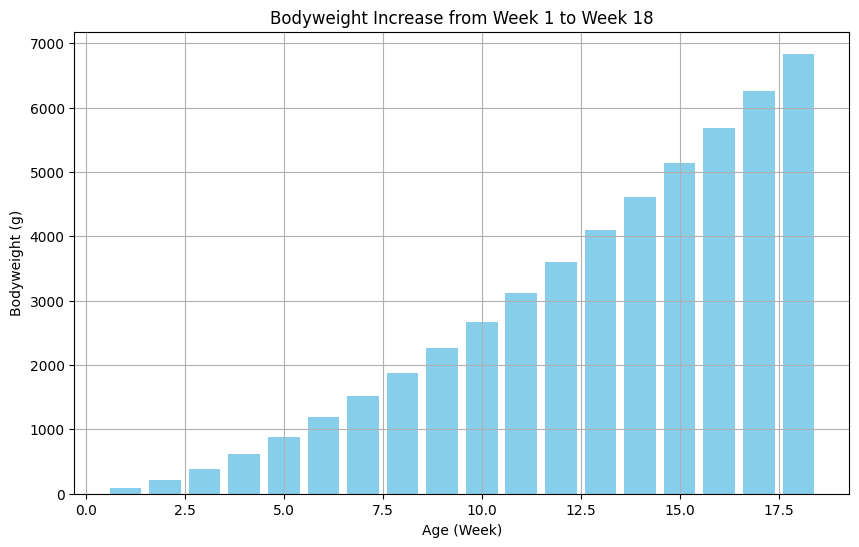

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare the data
data = {
    'Age(Week)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Consumption in g/bird/day': ['65-70', '110-120', '190-200', '280-295', '380-400',
                                  '475-500', '570-600', '660-695', '750-790', '840-900',
                                  '930-990', '1020-1090', '1110-1180', '1190-1255',
                                  '1270-1340', '1350-1425', '1430-1510', '1500-1580'],
    'Bodyweight (g)': ['84', '210', '392', '623', '889', '1190', '1519', '1876',
                       '2261', '2674', '3122', '3605', '4095', '4606', '5138',
                       '5691', '6258', '6839'],
    'Cumulative g to date': ['84', '210', '392', '623', '889', '1190', '1519', '1876',
                             '2261', '2674', '3122', '3605', '4095', '4606', '5138',
                             '5691', '6258', '6839'],
    'Production (%)': [0] * 18  # Egg production is 0 from week 1 to week 18
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Step 2: Convert Consumption ranges to average
def consumption_average(consumption_range):
    low, high = map(int, consumption_range.split('-'))
    return (low + high) / 2

df['Consumption Avg (g/bird/day)'] = df['Consumption in g/bird/day'].apply(consumption_average)
df['Bodyweight (g)'] = df['Bodyweight (g)'].astype(int)  # Convert Bodyweight to int
df['Cumulative g to date'] = df['Cumulative g to date'].astype(int)  # Convert Cumulative to int

# Step 3: Display the table
print(df)

# Step 4: Plot the Bodyweight increase over weeks
plt.figure(figsize=(10, 6))
plt.bar(df['Age(Week)'], df['Bodyweight (g)'], color='skyblue')
plt.xlabel('Age (Week)')
plt.ylabel('Bodyweight (g)')
plt.title('Bodyweight Increase from Week 1 to Week 18')
plt.grid(True)
plt.show()


again using machine learnig model with preprocessing data

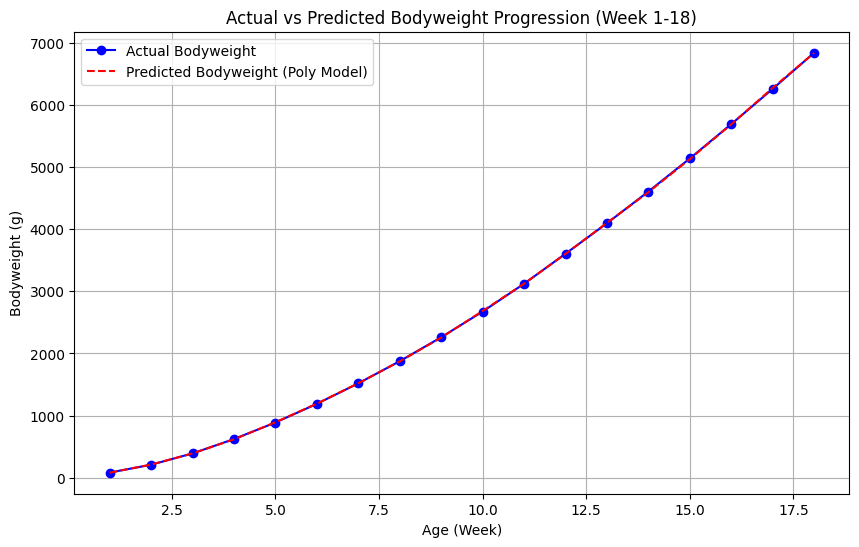

    Age(Week) Consumption in g/bird/day  Bodyweight (g)  Cumulative g to date  \
0           1                     65-70              84                    84   
1           2                   110-120             210                   210   
2           3                   190-200             392                   392   
3           4                   280-295             623                   623   
4           5                   380-400             889                   889   
5           6                   475-500            1190                  1190   
6           7                   570-600            1519                  1519   
7           8                   660-695            1876                  1876   
8           9                   750-790            2261                  2261   
9          10                   840-900            2674                  2674   
10         11                   930-990            3122                  3122   
11         12               

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Prepare the data
data = {
    'Age(Week)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Consumption in g/bird/day': ['65-70', '110-120', '190-200', '280-295', '380-400',
                                  '475-500', '570-600', '660-695', '750-790', '840-900',
                                  '930-990', '1020-1090', '1110-1180', '1190-1255',
                                  '1270-1340', '1350-1425', '1430-1510', '1500-1580'],
    'Bodyweight (g)': ['84', '210', '392', '623', '889', '1190', '1519', '1876',
                       '2261', '2674', '3122', '3605', '4095', '4606', '5138',
                       '5691', '6258', '6839'],
    'Cumulative g to date': ['84', '210', '392', '623', '889', '1190', '1519', '1876',
                             '2261', '2674', '3122', '3605', '4095', '4606', '5138',
                             '5691', '6258', '6839'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Consumption ranges to average
def consumption_average(consumption_range):
    low, high = map(int, consumption_range.split('-'))
    return (low + high) / 2

df['Consumption Avg (g/bird/day)'] = df['Consumption in g/bird/day'].apply(consumption_average)
df['Bodyweight (g)'] = df['Bodyweight (g)'].astype(int)
df['Cumulative g to date'] = df['Cumulative g to date'].astype(int)

# Step 2: Prepare the features and target variable
X = df[['Age(Week)', 'Consumption Avg (g/bird/day)']].values  # Features (Age and Consumption)
y = df['Bodyweight (g)'].values  # Target (Bodyweight)

# Step 3: Preprocessing the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the model
y_pred_linear = linear_model.predict(X_test)

# Step 6: Fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predictions with the polynomial model
y_pred_poly = poly_model.predict(X_poly)

# Step 7: Visualization of actual vs predicted bodyweight
plt.figure(figsize=(10, 6))

# Plot actual bodyweight
plt.plot(df['Age(Week)'], df['Bodyweight (g)'], label='Actual Bodyweight', color='blue', marker='o')

# Plot predicted bodyweight (Polynomial model)
plt.plot(df['Age(Week)'], y_pred_poly, label='Predicted Bodyweight (Poly Model)', color='red', linestyle='--')

plt.xlabel('Age (Week)')
plt.ylabel('Bodyweight (g)')
plt.title('Actual vs Predicted Bodyweight Progression (Week 1-18)')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Display the preprocessed data and predictions
df['Predicted Bodyweight (g)'] = y_pred_poly
print(df)


add path from drive to same code

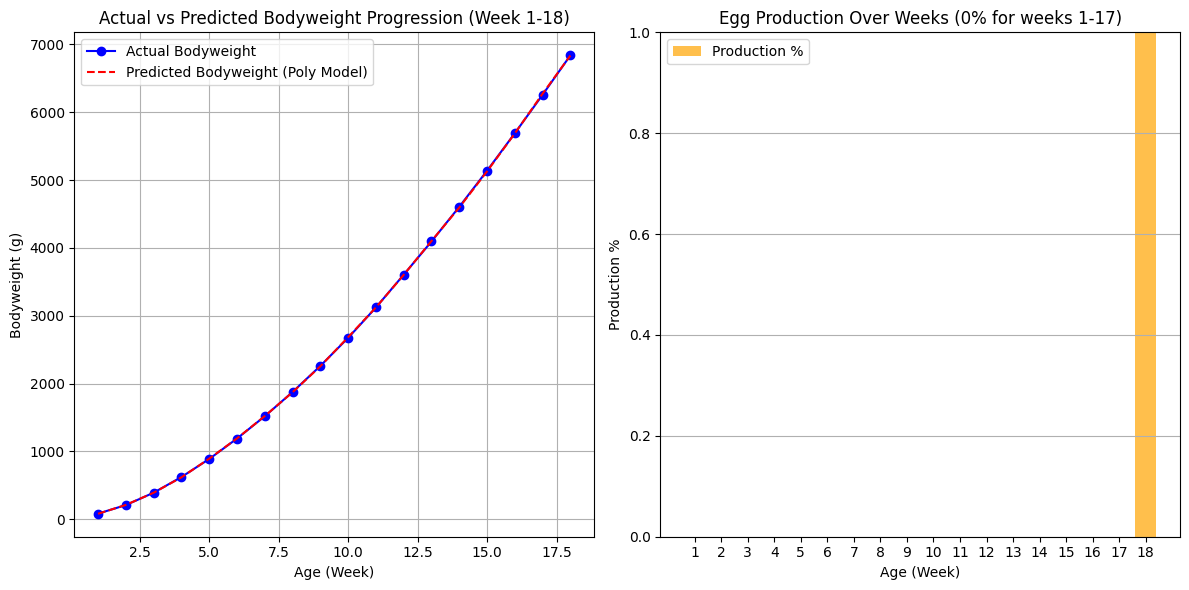

    Age(Week) Consumption in g/bird/day  Bodyweight (g)  Cumulative g to date  \
0           1                     65-70              84                    84   
1           2                   110-120             210                   210   
2           3                   190-200             392                   392   
3           4                   280-295             623                   623   
4           5                   380-400             889                   889   
5           6                   475-500            1190                  1190   
6           7                   570-600            1519                  1519   
7           8                   660-695            1876                  1876   
8           9                   750-790            2261                  2261   
9          10                   840-900            2674                  2674   
10         11                   930-990            3122                  3122   
11         12               

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Prepare the data
data = {
    'Age(Week)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Consumption in g/bird/day': ['65-70', '110-120', '190-200', '280-295', '380-400',
                                   '475-500', '570-600', '660-695', '750-790', '840-900',
                                   '930-990', '1020-1090', '1110-1180', '1190-1255',
                                   '1270-1340', '1350-1425', '1430-1510', '1500-1580'],
    'Bodyweight (g)': ['84', '210', '392', '623', '889', '1190', '1519', '1876',
                       '2261', '2674', '3122', '3605', '4095', '4606', '5138',
                       '5691', '6258', '6839'],
    'Cumulative g to date': ['84', '210', '392', '623', '889', '1190', '1519', '1876',
                             '2261', '2674', '3122', '3605', '4095', '4606', '5138',
                             '5691', '6258', '6839'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Consumption ranges to average
def consumption_average(consumption_range):
    low, high = map(int, consumption_range.split('-'))
    return (low + high) / 2

df['Consumption Avg (g/bird/day)'] = df['Consumption in g/bird/day'].apply(consumption_average)
df['Bodyweight (g)'] = df['Bodyweight (g)'].astype(int)
df['Cumulative g to date'] = df['Cumulative g to date'].astype(int)

# Step 2: Add production percentage
production_percentage = [0] * 17 + [1]  # 0% for weeks 1-17, 1% for week 18
df['Production %'] = production_percentage

# Step 3: Prepare the features and target variable
X = df[['Age(Week)', 'Consumption Avg (g/bird/day)']].values  # Features (Age and Consumption)
y = df['Bodyweight (g)'].values  # Target (Bodyweight)

# Step 4: Preprocessing the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the model
y_pred_linear = linear_model.predict(X_test)

# Step 7: Fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predictions with the polynomial model
y_pred_poly = poly_model.predict(X_poly)

# Step 8: Visualization of actual vs predicted bodyweight and production
plt.figure(figsize=(12, 6))

# Plot actual bodyweight
plt.subplot(1, 2, 1)
plt.plot(df['Age(Week)'], df['Bodyweight (g)'], label='Actual Bodyweight', color='blue', marker='o')
plt.plot(df['Age(Week)'], y_pred_poly, label='Predicted Bodyweight (Poly Model)', color='red', linestyle='--')
plt.xlabel('Age (Week)')
plt.ylabel('Bodyweight (g)')
plt.title('Actual vs Predicted Bodyweight Progression (Week 1-18)')
plt.legend()
plt.grid(True)

# Plot production percentage
plt.subplot(1, 2, 2)
plt.bar(df['Age(Week)'], df['Production %'], color='orange', alpha=0.7, label='Production %')
plt.xlabel('Age (Week)')
plt.ylabel('Production %')
plt.title('Egg Production Over Weeks (0% for weeks 1-17)')
plt.xticks(df['Age(Week)'])
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Step 9: Display the preprocessed data with predictions and production
df['Predicted Bodyweight (g)'] = y_pred_poly
print(df)


next 18-90 week data set visualize

In [ ]:
import pandas as pd

# Reading the dataset from a CSV file
df_avg_body_weight = pd.read_csv('average_body_weight(18-90).csv')

# Display the first few rows of the dataset to ensure it has been read correctly
print(df_avg_body_weight.head())


   Age(Week)  Consumption in g/bird/day  Bodyweight (g)  Production %
0         18                         83            1500           NaN
1         19                         87            1580           1.0
2         20                         94            1640          15.0
3         21                        104            1685          39.0
4         22                        108            1720          68.0


Import Libraries and Load Data

Saving Novogen_Brown_Layer_Hens.csv to Novogen_Brown_Layer_Hens (1).csv
   Age_Week  Consumption_g_per_bird_per_day  Bodyweight_g  Production_%
0         1                              12          67.5             0
1         2                              18         115.0             0
2         3                              26         195.0             0
3         4                              33         287.5             0
4         5                              38         390.0             0
Mean Squared Error: 5.720554483238966
R^2 Score: 0.9938127471447571


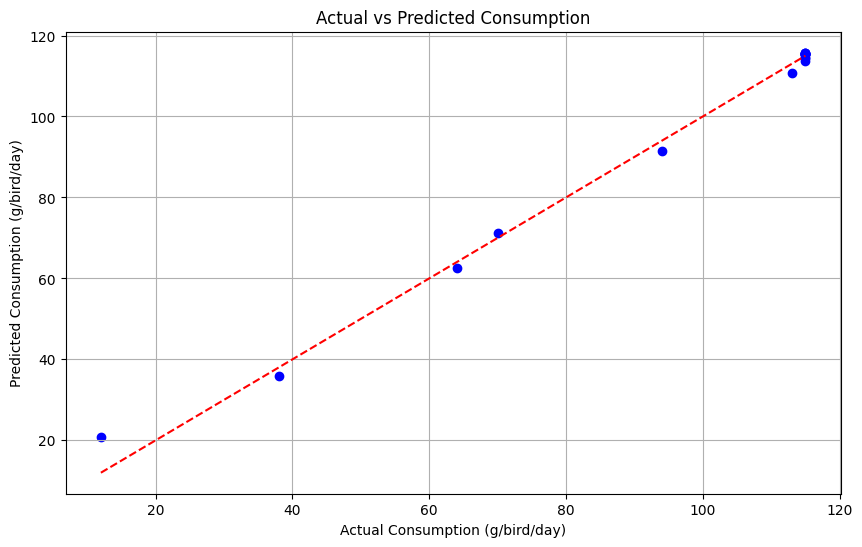

In [16]:
# Install necessary packages if not already installed
!pip install pandas scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Step 1: Upload the CSV file
uploaded = files.upload()

# Step 2: Read the CSV file into a DataFrame
df = pd.read_csv('Novogen_Brown_Layer_Hens.csv')

# Display the first few rows of the DataFrame to verify
print(df.head())

# Step 3: Define independent and dependent variables
# Adjust column names as per your CSV file
X = df[['Age_Week', 'Bodyweight_g', 'Production_%']]  # Independent variables
y = df['Consumption_g_per_bird_per_day']  # Dependent variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 8: Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Line for perfect predictions
plt.xlabel('Actual Consumption (g/bird/day)')
plt.ylabel('Predicted Consumption (g/bird/day)')
plt.title('Actual vs Predicted Consumption')
plt.grid()
plt.show()


Visualization

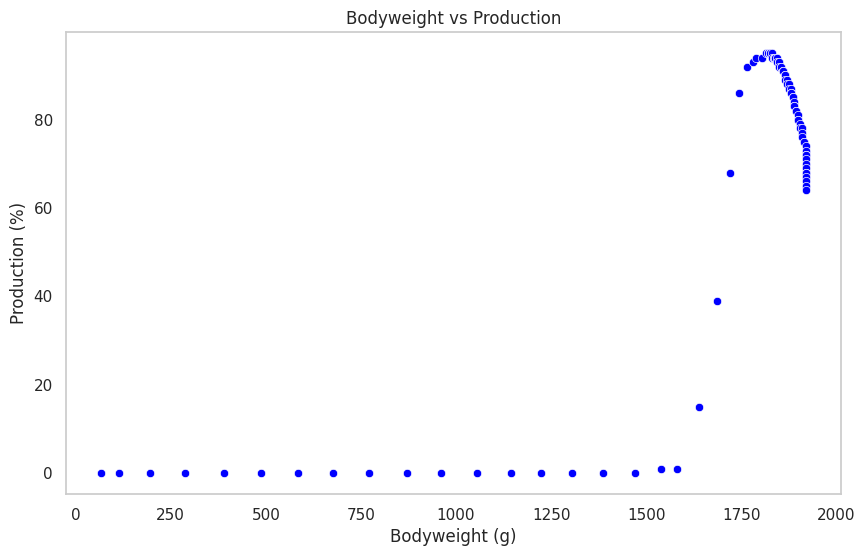

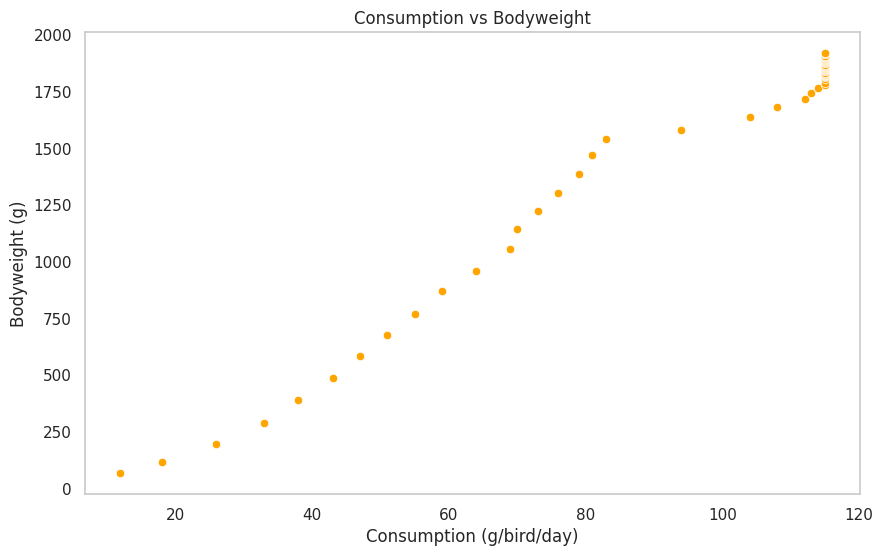

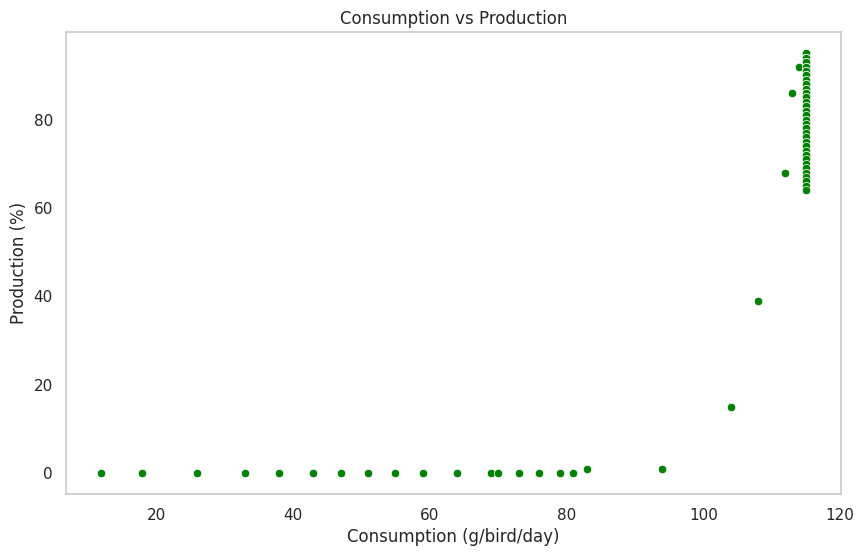

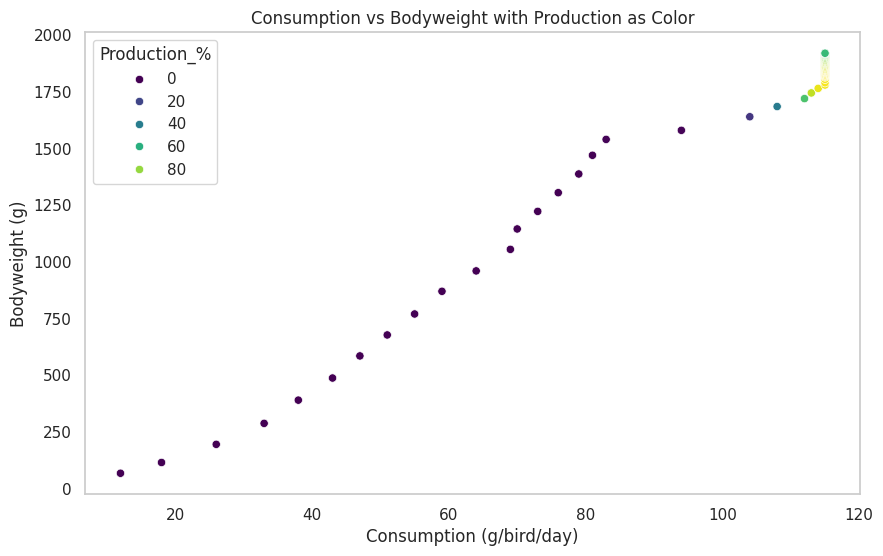

In [17]:
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Visualize Bodyweight vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bodyweight_g', y='Production_%', data=df, color='blue')
plt.title('Bodyweight vs Production')
plt.xlabel('Bodyweight (g)')
plt.ylabel('Production (%)')
plt.grid()
plt.show()

# Visualize Consumption vs Bodyweight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Consumption_g_per_bird_per_day', y='Bodyweight_g', data=df, color='orange')
plt.title('Consumption vs Bodyweight')
plt.xlabel('Consumption (g/bird/day)')
plt.ylabel('Bodyweight (g)')
plt.grid()
plt.show()

# Visualize Consumption vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Consumption_g_per_bird_per_day', y='Production_%', data=df, color='green')
plt.title('Consumption vs Production')
plt.xlabel('Consumption (g/bird/day)')
plt.ylabel('Production (%)')
plt.grid()
plt.show()

# Visualize Consumption vs Bodyweight vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Consumption_g_per_bird_per_day', y='Bodyweight_g', hue='Production_%', palette='viridis', data=df)
plt.title('Consumption vs Bodyweight with Production as Color')
plt.xlabel('Consumption (g/bird/day)')
plt.ylabel('Bodyweight (g)')
plt.grid()
plt.show()
